## load data

In [1]:
pylab

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


In [27]:
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer

In [3]:
from sklearn.datasets import load_breast_cancer

data = load_breast_cancer()

datas = data['data']
targets = data['target']



In [4]:
datas.shape

(569, 30)

## test my_knn

In [5]:
%run knn.py
from model_selection import train_test_split
from metrics import accuracy_score

In [6]:
counts = datas.shape[0]
loops = 20
test_ratio = 0.2

In [8]:
my_knn = KNNclassifier(5,weights='uniform')
results = []
for _ in np.arange(loops):
    
    train_x ,test_x,train_y,test_y = train_test_split(datas,targets,test_ratio=test_ratio,seed=66)
    
    
    my_knn.fit(train_x,train_y)
    #predictions = my_knn.predict(test_x)

    #accuracy = accuracy_score(test_y,predictions)
    accuracy = my_knn.score(test_x,test_y)
    results.append(accuracy)

print('average accuracy of knn: ', np.mean(results))

average accuracy of knn:  0.9203539823008849


## sklearn 

In [175]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [176]:
knn_classifier = KNeighborsClassifier()

In [179]:
params = [{'weights':['uniform'],'n_neighbors':[i for i in np.arange(3,11)]},{'weights':['distance'],'n_neighbors':[i for i in np.arange(3,11)],'p':[i for i in np.arange(1,5)]}]

In [192]:

grid_search = GridSearchCV(knn_classifier,params,n_jobs=-1,verbose=4)

In [193]:
%%time 
grid_search.fit(datas,targets)

/usr/local/lib/python3.7/site-packages/sklearn/model_selection/_split.py:1943: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.


Fitting 3 folds for each of 40 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    2.3s
[Parallel(n_jobs=-1)]: Done  90 tasks      | elapsed:   33.0s


CPU times: user 360 ms, sys: 41.8 ms, total: 402 ms
Wall time: 49.2 s


[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:   49.2s finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
       estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform'),
       fit_params=None, iid='warn', n_jobs=-1,
       param_grid=[{'weights': ['uniform'], 'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10]}, {'weights': ['distance'], 'n_neighbors': [3, 4, 5, 6, 7, 8, 9, 10], 'p': [1, 2, 3, 4]}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=4)

In [187]:
grid_search.best_estimator_.score(test_x,test_y)

0.9944289693593314

## 归一化

In [24]:
%matplotlib inline

In [17]:
x = np.random.rand(50,2)

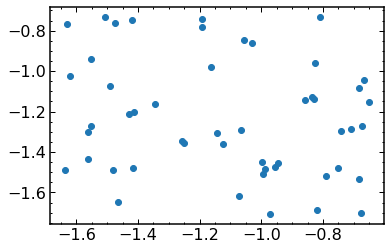

In [25]:
plt.scatter(x[:,0],x[:,1])

In [21]:
x[:,1]=x[:,1]-x[:,1].mean()/x[:,1].std()

In [23]:
plt.scatter(x[:,0],x[:,1])

In [31]:
x

array([[-1.62069802, -1.022869  ],
       [-1.63774375, -1.48704419],
       [-1.25865319, -1.34630431],
       [-0.99785538, -1.45182764],
       [-0.70956504, -1.28619691],
       [-0.95507774, -1.47352074],
       [-1.19361498, -0.74043727],
       [-1.41329544, -1.20193431],
       [-0.67454552, -1.27312761],
       [-1.02938764, -0.86123433],
       [-0.67778369, -1.70321348],
       [-1.48284607, -1.48924692],
       [-0.80903332, -0.73104754],
       [-1.34472415, -1.1624017 ],
       [-0.68238167, -1.08120898],
       [-0.74979785, -1.48052014],
       [-0.66714302, -1.046418  ],
       [-0.74085462, -1.29624687],
       [-1.05530159, -0.84727259],
       [-1.56083373, -1.30056204],
       [-1.16469094, -0.98126289],
       [-1.56162092, -1.4339366 ],
       [-1.14316381, -1.30830381],
       [-0.82588839, -0.95909995],
       [-1.06594818, -1.29143854],
       [-0.82013905, -1.68799053],
       [-0.97158724, -1.70887618],
       [-1.12341041, -1.35853801],
       [-1.41719118,

In [13]:
(x-x.mean())/x.std()

array([-1.35191191, -1.28307729, -0.42264456,  1.36705552, -1.48958115,
       -0.28497532, -0.97332151,  0.26570163,  0.57545741,  1.2638036 ,
        1.40147283,  1.33263822,  0.12803239, -0.49147918,  1.29822091,
       -1.55841576,  0.74754396,  0.26570163,  0.5410401 , -0.45706187,
       -0.31939263, -0.00963685, -1.14540805,  1.19496898,  0.19686701,
       -0.73240034, -0.07847147, -1.62725038,  0.05919777,  1.53914207,
        0.5410401 , -0.97332151,  0.9196305 , -1.83375424,  0.36895356,
       -1.28307729, -1.04215613, -1.79933693,  1.16055167,  1.22938629,
        1.09171705,  0.74754396, -0.87006958, -0.49147918,  0.57545741,
        1.36705552,  0.47220548,  0.9196305 ,  0.88521319, -1.14540805,
       -1.76491962, -0.52589649,  1.40147283, -0.07847147,  0.78196127,
        1.16055167, -1.07657343,  1.57355938, -0.80123496, -0.18172339,
       -1.04215613, -1.14540805, -1.59283307, -0.5947311 ,  0.85079589,
       -0.9389042 , -0.31939263, -0.5603138 ,  0.78196127, -1.24